First 5 rows of the dataset:
   ID  Age  Experience  Income  ZIP Code  Family  CCAvg  Education  Mortgage  \
0  10   34           9     180     93023       1    8.9          3         0   
1  17   38          14     130     95010       4    4.7          3       134   
2  19   46          21     193     91604       2    8.1          3         0   
3  30   38          13     119     94104       1    3.3          2         0   
4  39   42          18     141     94114       3    5.0          3         0   

   Personal Loan  Securities Account  CD Account  Online  CreditCard  
0              1                   0           0       0           0  
1              1                   0           0       0           0  
2              1                   0           0       0           0  
3              1                   0           1       1           1  
4              1                   1           1       1           0  

Missing values in the dataset:
ID                    0
Age     

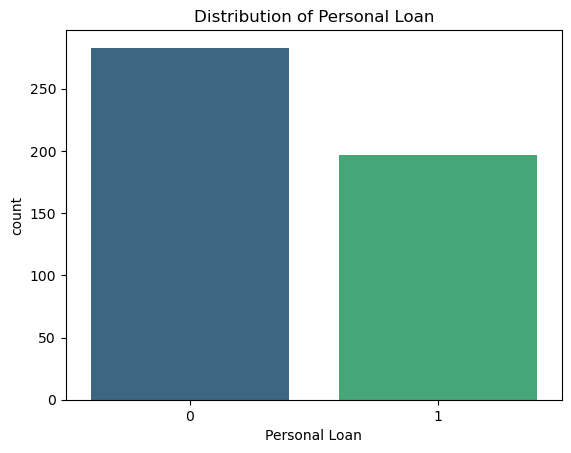

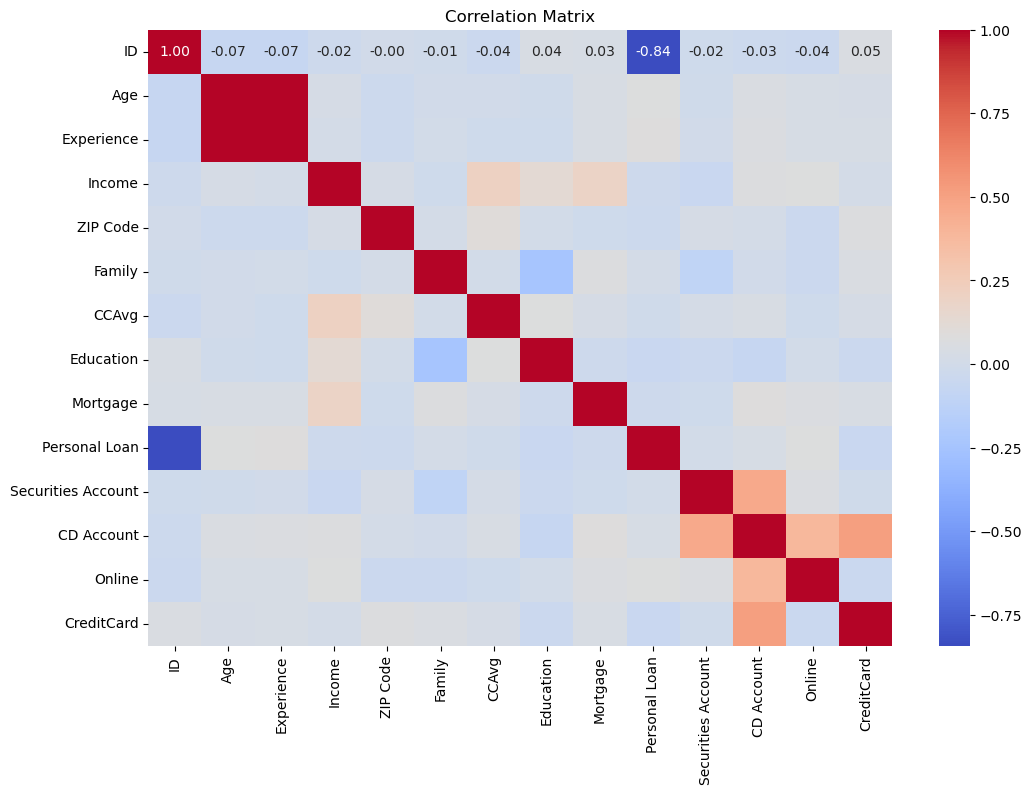

C:\Users\Mohammed Saif Wasay\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Mohammed Saif Wasay\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Mohammed Saif Wasay\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Mohammed Saif Wasay\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a fu

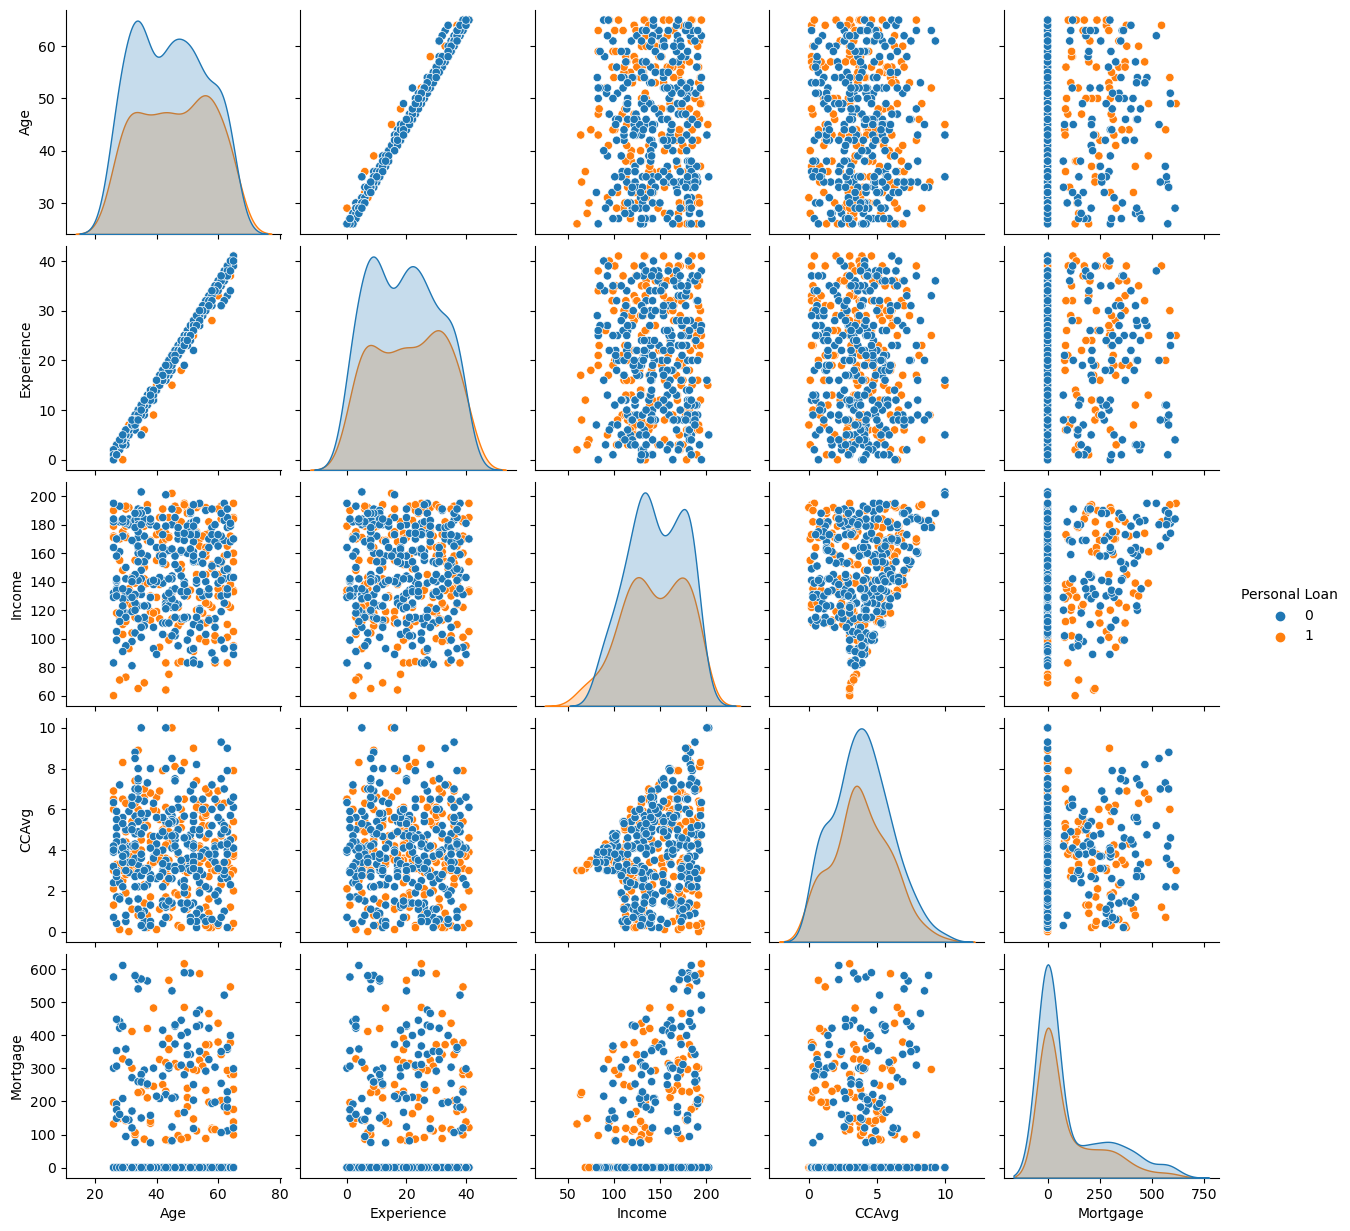

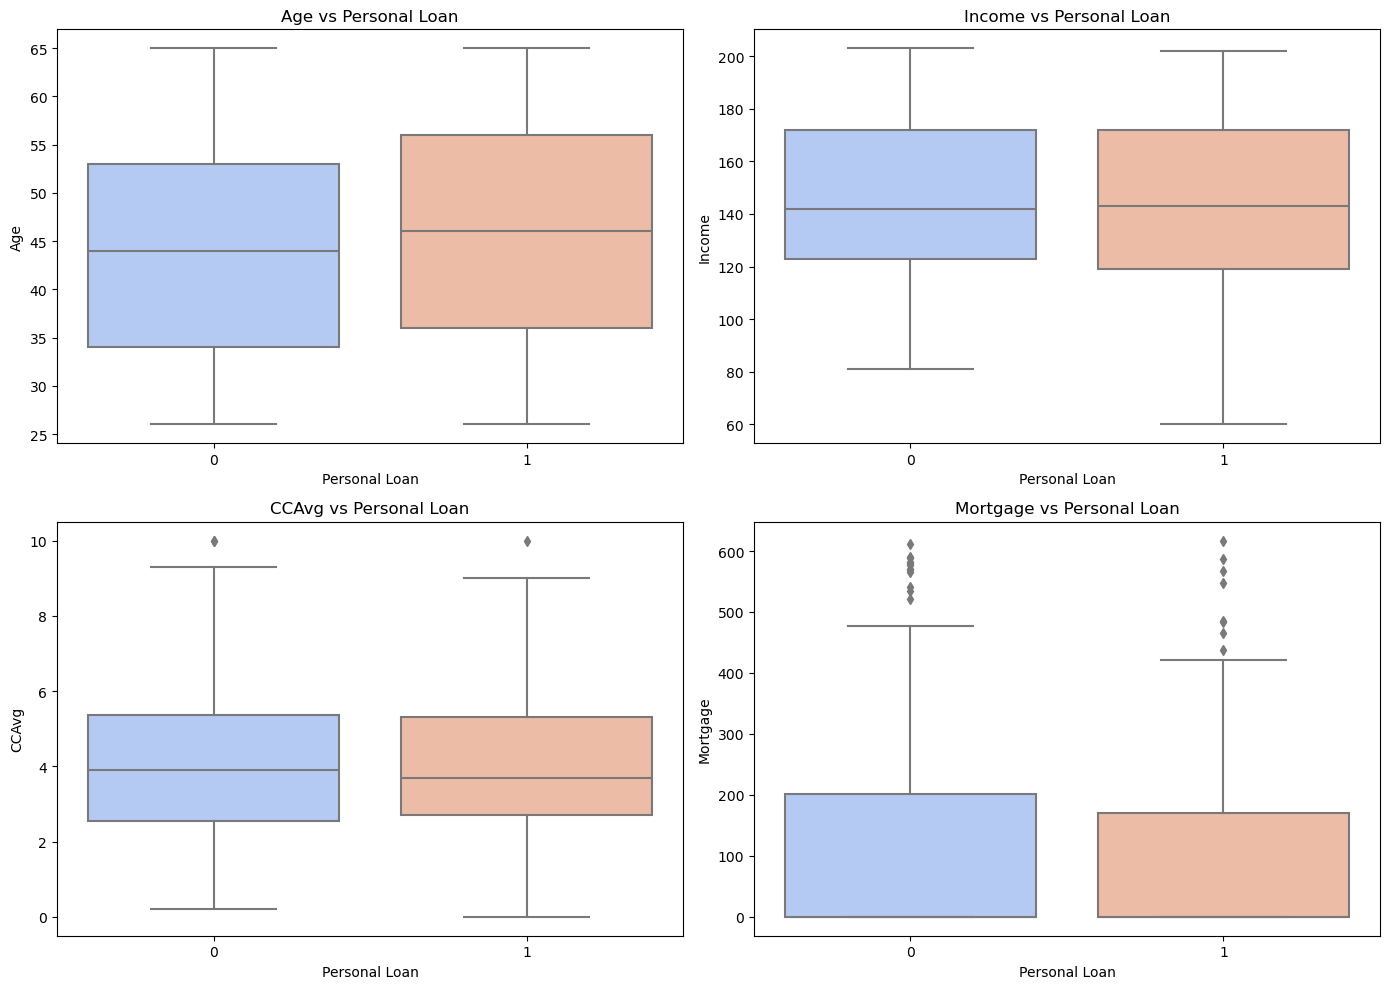


Model Performance:
Accuracy: 98.96%
Precision: 97.50%

Confusion Matrix:


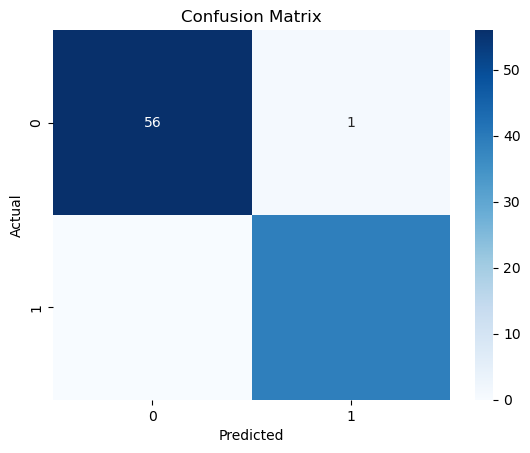


Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.98      0.99        57
           1       0.97      1.00      0.99        39

    accuracy                           0.99        96
   macro avg       0.99      0.99      0.99        96
weighted avg       0.99      0.99      0.99        96


Feature Importance (Coefficients):
               Feature  Coefficient
9   Securities Account     0.243887
11              Online     0.220181
1                  Age     0.174452
2           Experience     0.120885
5               Family     0.044665
12          CreditCard     0.039579
8             Mortgage    -0.036671
3               Income    -0.056540
7            Education    -0.087306
6                CCAvg    -0.101181
10          CD Account    -0.213942
4             ZIP Code    -0.289585
0                   ID    -5.823139


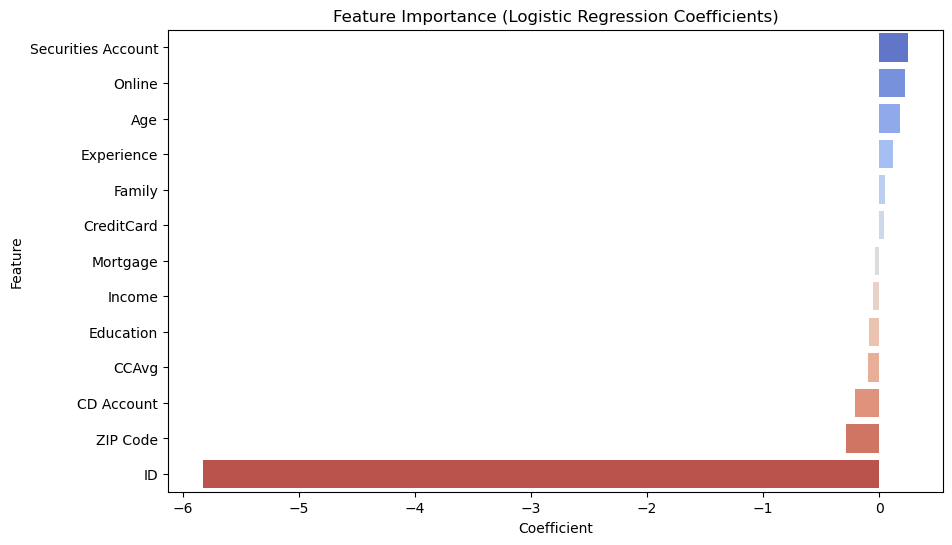

In [8]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler

# Load the dataset (replace with your file path)
data = pd.read_excel("Bank1_Personal.xlsx")

# Display the first 5 rows of the dataset
print("First 5 rows of the dataset:")
print(data.head())

# Check for missing values
print("\nMissing values in the dataset:")
print(data.isnull().sum())

# Drop rows with missing values (if necessary)
data.dropna(inplace=True)

# Basic statistics of the dataset
print("\nBasic Statistics of the dataset:")
print(data.describe())

# Check data types
print("\nData types in the dataset:")
print(data.info())

# Target Variable Distribution (Personal Loan)
print("\nDistribution of the target variable (Personal Loan):")
print(data['Personal Loan'].value_counts())
sns.countplot(data=data, x='Personal Loan', palette='viridis')
plt.title("Distribution of Personal Loan")
plt.show()

# Feature correlation heatmap
plt.figure(figsize=(12, 8))
correlation_matrix = data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

# Pairplot for key numerical features
sns.pairplot(data, hue='Personal Loan', vars=['Age', 'Experience', 'Income', 'CCAvg', 'Mortgage'], diag_kind='kde')
plt.show()

# Visualizing relationships between key features and target variable
plt.figure(figsize=(14, 10))

# Age vs Personal Loan
plt.subplot(2, 2, 1)
sns.boxplot(data=data, x='Personal Loan', y='Age', palette='coolwarm')
plt.title("Age vs Personal Loan")

# Income vs Personal Loan
plt.subplot(2, 2, 2)
sns.boxplot(data=data, x='Personal Loan', y='Income', palette='coolwarm')
plt.title("Income vs Personal Loan")

# CCAvg vs Personal Loan
plt.subplot(2, 2, 3)
sns.boxplot(data=data, x='Personal Loan', y='CCAvg', palette='coolwarm')
plt.title("CCAvg vs Personal Loan")

# Mortgage vs Personal Loan
plt.subplot(2, 2, 4)
sns.boxplot(data=data, x='Personal Loan', y='Mortgage', palette='coolwarm')
plt.title("Mortgage vs Personal Loan")

plt.tight_layout()
plt.show()

# Feature selection: Dropping irrelevant features like 'ID', 'ZIP Code'
#data = data.drop(columns=['ID', 'ZIP Code'])

# Separate features (X) and target variable (y)
X = data.drop(columns=['Personal Loan'])  # All columns except the target
y = data['Personal Loan']                 # Target variable

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data into training and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Train the Logistic Regression Model
model = LogisticRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the Model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

# Display Model Evaluation Results
print("\nModel Performance:")
print(f"Accuracy: {accuracy * 100:.2f}%")
print(f"Precision: {precision * 100:.2f}%")

# Confusion Matrix
print("\nConfusion Matrix:")
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt="d")
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Classification Report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Feature Importance (Logistic Regression Coefficients)
coefficients = pd.DataFrame({
    'Feature': data.drop(columns=['Personal Loan']).columns,
    'Coefficient': model.coef_[0]
}).sort_values(by='Coefficient', ascending=False)

print("\nFeature Importance (Coefficients):")
print(coefficients)

# Visualize Feature Importance
plt.figure(figsize=(10, 6))
sns.barplot(data=coefficients, x='Coefficient', y='Feature', palette='coolwarm')
plt.title("Feature Importance (Logistic Regression Coefficients)")
plt.show()
